In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [153]:
data=pd.read_csv(r"D:\collage\sem4\ML\Assignement2\train.csv")

In [154]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
data.shape


(891, 12)

In [156]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Q1: Find the relation of the following columns (having discrete values) with the “Survived” columns and answer the below questions:  
### 1)Pclass 2)Sex 3)Embarked
### 1. Find the total number of survivors from the 3rd PClass (Titanic_train.csv)
### 2. Find the total number of male who died in the accident (Titanic_train.csv)
### 3. Find the total number of the survivor who embarked the ship from "Southampton"


In [157]:
survivors_3rd_class = data.loc[(data['Pclass'] == 3) & (data['Survived'] == 1)]['Survived'].count()
print("Total number of survivors from the 3rd PClass: ", survivors_3rd_class)


Total number of survivors from the 3rd PClass:  119


In [158]:
males_died = data.loc[(data['Sex'] == 'male') & (data['Survived'] == 0)]['Survived'].count()
print("Total number of males who died in the accident: ", males_died)

Total number of males who died in the accident:  468


In [159]:
survivors_southampton = data.loc[(data['Embarked'] == 'S') & (data['Survived'] == 1)]['Survived'].count()

print("Total number of survivors who embarked the ship from Southampton: ", survivors_southampton)

Total number of survivors who embarked the ship from Southampton:  217


## Q2: Some of the values in the "Age" column are missing. Use Linear Regression model to fill the missing values in the dataset. (Hint: Dependent Variable(Age)) to fill(predict) the missing values. 


### 1. Print the total number of cells having missing values in the Age column.
### 2. Print the sum of the index number of all the cells with missing values

In [ ]:

num_missing = data['Age'].isnull().sum()

print("Total number of cells with missing value is:", num_missing)

In [161]:
missing_values_index = list(data[data['Age'].isnull()].index)

# calculate the sum of the indices where missing values are present
sum_of_indices = sum(missing_values_index)

# print the sum of the index number of all the cells with missing values
print("Sum of the index number of all the cells with missing values:", sum_of_indices)

Sum of the index number of all the cells with missing values: 76921


In [162]:
df1 = data[data['Age'].isnull()]
df2 = data[data['Age'].notnull()]

In [163]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [164]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
from sklearn.linear_model import LinearRegression

# create X and y for training the linear regression model
X = df2[['Pclass', 'SibSp', 'Parch', 'Fare']]
y = df2['Age']

# train the linear regression model
model = LinearRegression()
model.fit(X, y)

# use the trained model to predict ages for the missing values in df1
X_pred = df1[['Pclass', 'SibSp', 'Parch', 'Fare']]
y_pred = model.predict(X_pred)

# fill in the missing values in df1 with the predicted ages
df1['Age'] = y_pred

# calculate the mean of the predicted ages
mean_age = df1['Age'].mean()

print(mean_age)

mean_Age = round(df1['Age'].mean())

print("Rounding Mean Age:",mean_Age)

27.592793521975185
Rounding Mean Age: 28


## Question 3
### After performing the analysis from the previous question, derive a new column called
### “AdultOrChild” having categorical values as “Adult” or “Child” derived from Age column
### Hint: A person having Age >=18 is an “Adult” and the one having Age < 18 is a “Child”.

### 1. Find its relation with the “Survived” Column and print the total number of survivors.

### 2. Consider below features to create a Classification model and predict the survived category Pclass AgeSex (Encode values using LabelEncoder)


In [166]:
data['AdultOrChild'] = data.apply(lambda x: 'Adult' if x.Age >= 18 else 'Child', axis=1)


In [167]:
survivors = data.groupby(['AdultOrChild', 'Survived'])['Survived'].count()
print(survivors)

AdultOrChild  Survived
Adult         0           372
              1           229
Child         0           177
              1           113
Name: Survived, dtype: int64


In [178]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])


In [179]:
X = data[['Pclass', 'Age', 'Sex']]
y = data['Survived']
print(X)
print(y)

     Pclass        Age  Sex
5         3  27.525206    1
17        2  34.211637    1
19        3  27.549701    0
26        3  27.549701    1
28        3  27.536708    0
..      ...        ...  ...
885       3  39.000000    0
886       2  27.000000    1
887       1  19.000000    0
889       1  26.000000    1
890       3  32.000000    1

[891 rows x 3 columns]
5      0
17     1
19     1
26     0
28     1
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [181]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0], dtype=int64)

In [182]:
cm = confusion_matrix(y_test, y_pred)

In [183]:
print(cm)

[[92 15]
 [24 48]]


In [184]:
print('Sum of all elements in the confusion matrix:',cm.sum())

Sum of all elements in the confusion matrix: 179


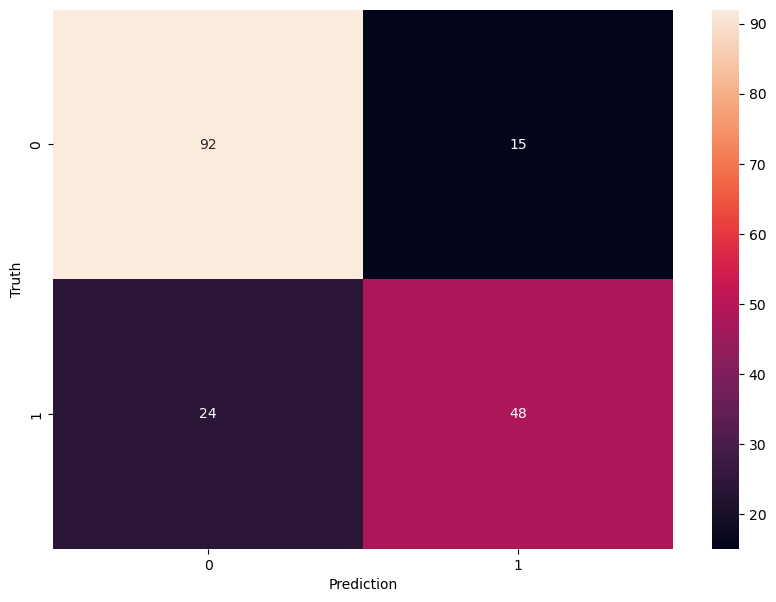

In [185]:
plt.figure(figsize = (10,7), facecolor = 'white')
sns.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()